<a href="https://colab.research.google.com/github/lukeshkolhe/DBSCAN-Algorithm/blob/master/alemeno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import numpy as np
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.layers import Dense, Activation
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.models import Model
# import matplotlib.pyplot as plt
# from tensorflow.keras.applications import imagenet_utils
# %matplotlib inline
 
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [ ]:
def prepare_image(file):
    img = image.load_img(file, target_size=(224, 224))
    plt.imshow(img)
    plt.show()
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/alemeno',
    target_size=(224,224),
    batch_size = 3,
    class_mode = "binary"
)

Found 369 images belonging to 2 classes.


In [ ]:
valid_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/alemeno_valid/',
    target_size=(224,224),
    batch_size = 3,
    class_mode = "binary"
)

Found 32 images belonging to 2 classes.


In [ ]:
from keras.applications import MobileNet

from keras.layers import GlobalAveragePooling2D, Dense, Dropout
 
base_conv = MobileNet(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

In [ ]:
from keras.models import Model

# add a global spatial average pooling layer
x = base_conv.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(2048, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# this is the model we will train
model = Model(inputs=base_conv.input, outputs=predictions)

In [ ]:
# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional mobilenet layers
for layer in base_conv.layers:
    layer.trainable = False

In [ ]:
from keras.optimizers import Adam
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
training_history = model.fit(train_generator, epochs=100, verbose=1, validation_data=valid_generator)

Epoch 1/100
 14/123 [==>...........................] - ETA: 1:17 - loss: 0.8924 - accuracy: 0.5833

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


123/123 [==============================] - 123s 969ms/step - loss: 0.6326 - accuracy: 0.8001 - val_loss: 0.5929 - val_accuracy: 0.8750
Epoch 2/100
123/123 [==============================] - 46s 371ms/step - loss: 0.3977 - accuracy: 0.9083 - val_loss: 0.3277 - val_accuracy: 0.9062
Epoch 3/100
123/123 [==============================] - 46s 376ms/step - loss: 0.1128 - accuracy: 0.9599 - val_loss: 0.8630 - val_accuracy: 0.8438
Epoch 4/100
123/123 [==============================] - 46s 373ms/step - loss: 0.2521 - accuracy: 0.9599 - val_loss: 0.7267 - val_accuracy: 0.8438
Epoch 5/100
123/123 [==============================] - 46s 372ms/step - loss: 0.4917 - accuracy: 0.9421 - val_loss: 0.6556 - val_accuracy: 0.9062
Epoch 6/100
123/123 [==============================] - 46s 373ms/step - loss: 0.5637 - accuracy: 0.9368 - val_loss: 0.8400 - val_accuracy: 0.9375
Epoch 7/100
123/123 [==============================] - 46s 372ms/step - loss: 0.5175 - accuracy: 0.9458 - val_loss: 0.2710 - val_accura

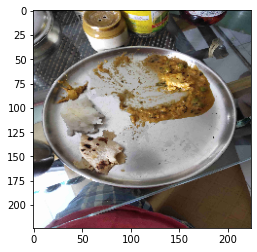

0.0


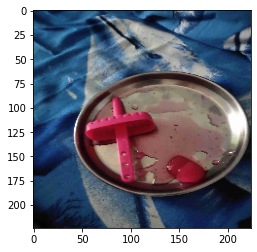

0.0


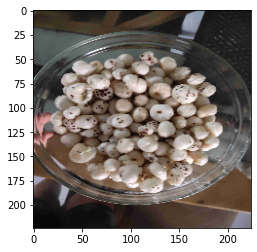

0.0


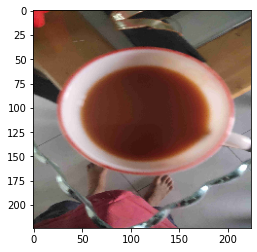

0.0


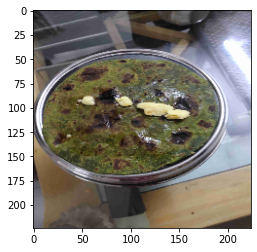

0.0


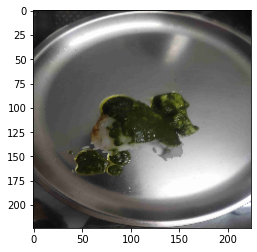

0.0


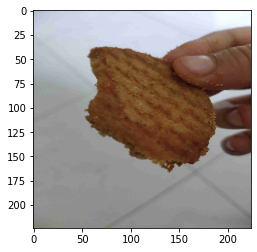

0.0


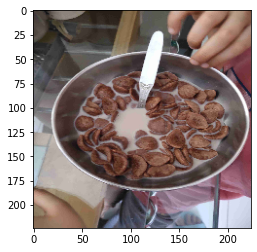

0.0


In [ ]:
dir = '/content/drive/MyDrive/Colab Notebooks/alemeno_test'
food_dir = dir + '/food/'
nonfood_dir = dir +'/nonfood/'
for img in os.listdir(food_dir):
  proc_img = prepare_image(food_dir + img)
  predicted = model.predict(proc_img)
  print(predicted[0][0].round())

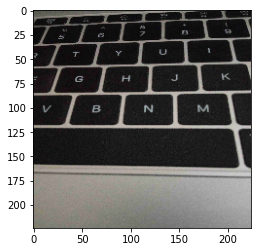

1.0


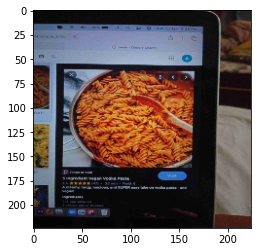

1.0


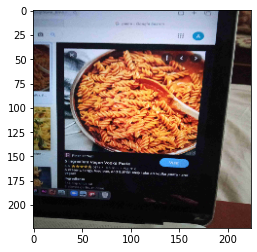

1.0


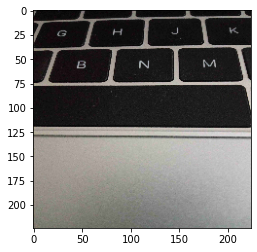

1.0


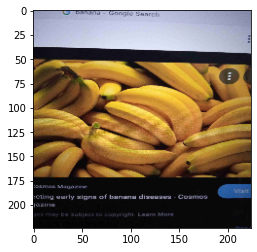

1.0


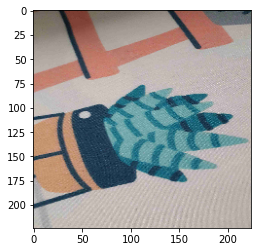

1.0


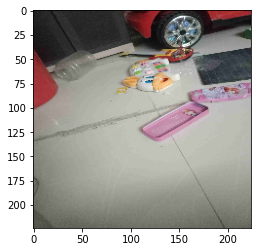

1.0


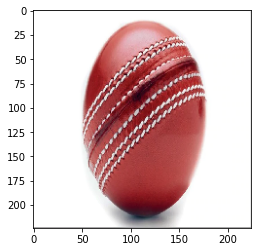

1.0


In [ ]:

for img in os.listdir(nonfood_dir):
  proc_img = prepare_image(nonfood_dir + img)
  predicted = model.predict(proc_img)
  print(predicted[0][0].round())

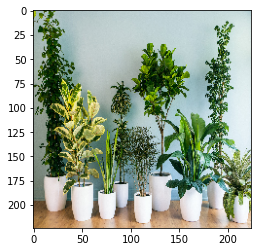

This is not Food


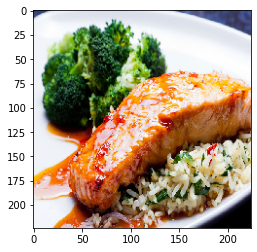

This is Food


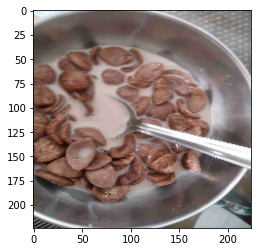

This is Food


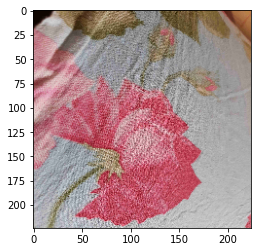

This is not Food


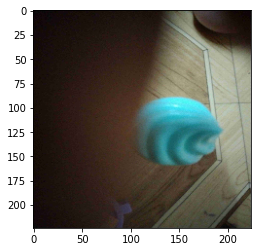

This is not Food


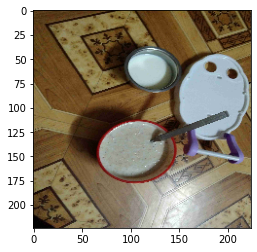

This is Food


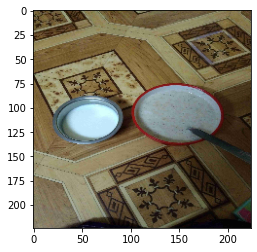

This is Food


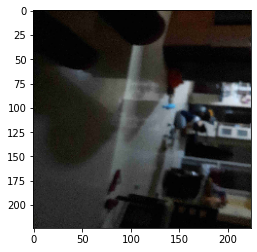

This is not Food


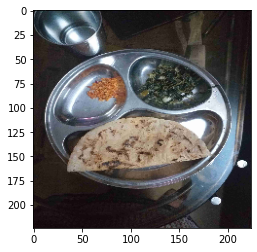

This is Food


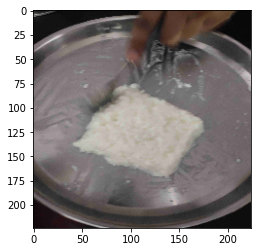

This is Food


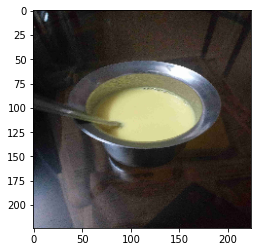

This is Food


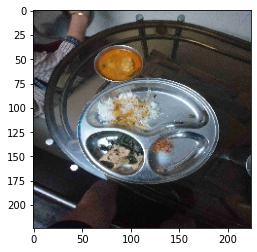

This is Food


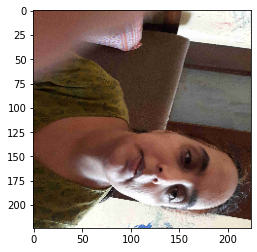

This is not Food


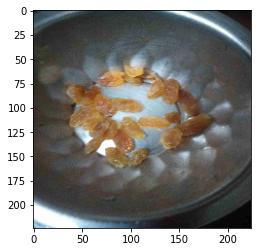

This is Food


In [ ]:

test_dir = '/content/drive/MyDrive/Colab Notebooks/alemeno_manual_test/'
for img in os.listdir(test_dir):
  proc_img = prepare_image(test_dir + img)
  predicted = model.predict(proc_img)
  if(int(predicted[0][0]) == 0):
    print('This is Food')
  else:
    print('This is not Food')